# Challenge: Titanic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("./Dataset/Train/Train.csv")

In [4]:
data.head(n=15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [6]:
le=LabelEncoder()
def cleanData(data):
    
    columns_to_drop=["name","ticket","cabin","embarked","home.dest","body","boat"]
    data_clean=data.drop(columns=columns_to_drop,axis=0)
    data_clean=data_clean.fillna(data_clean["age"].mean())
    data_clean=data_clean.fillna(data_clean["fare"].mean())
    #data_clean=data_clean.fillna(data_clean["boat"].mean())
    data_clean["sex"]=le.fit_transform(data_clean["sex"])
    Y_clean=data_clean["survived"]
    X_clean=data_clean.drop(columns=["survived"],axis=0)
    return X_clean,Y_clean

def cleanDataTest(data):
    le=LabelEncoder()
    columns_to_drop=["name","ticket","cabin","embarked","home.dest","body","boat"]
    data_clean=data.drop(columns=columns_to_drop,axis=0)
    data_clean=data_clean.fillna(data_clean["age"].mean())
    data_clean=data_clean.fillna(data_clean["fare"].mean())
    #data_clean=data_clean.fillna(data_clean["boat"].mean())
    data_clean["sex"]=le.fit_transform(data_clean["sex"])
    return data_clean

In [7]:
X_clean,Y_clean=cleanData(data)

In [8]:
X_clean.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0,29.838978,0.0,0.0,7.750
1,2.0,1,39.000000,0.0,0.0,26.000
2,2.0,0,40.000000,0.0,0.0,13.000
3,3.0,0,31.000000,1.0,1.0,20.525
4,3.0,0,29.838978,2.0,0.0,23.250


In [9]:
test=pd.read_csv("./Dataset/Test/Test.csv")
test_cleaned=cleanDataTest(test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,random_state=10)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
rf.fit(X_clean,Y_clean)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [35]:
rf.score(X_clean,Y_clean)

0.8245787908820614

In [36]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5,random_state=10),X_clean,Y_clean,cv=5).mean()
    acc_list.append(acc)

In [37]:
print(acc_list)
print(np.argmax(acc_list))

[0.7750410509031198, 0.7828934146998995, 0.7948337132073622, 0.797828591034973, 0.7978089846334828, 0.796833566159351, 0.7978187878342279, 0.7938386883317403, 0.7948631228095973, 0.7988334191113398, 0.8007842560596036, 0.796833566159351, 0.8008038624610936, 0.8008038624610936, 0.8008136656618386, 0.8018086905374604, 0.8017890841359703, 0.8028037154130823, 0.8037791338872141, 0.805769183638458, 0.804783961963581, 0.803769330686469, 0.8037987402887043, 0.8017988873367156, 0.805778986839203, 0.8037889370879592, 0.8037889370879592, 0.8037889370879592, 0.8037791338872141, 0.8067642085140798, 0.8087542582653235, 0.8037889370879594, 0.805769183638458, 0.8008430752640736, 0.8037791338872141, 0.8008038624610935, 0.8027939122123373, 0.803769330686469, 0.8027841090115923, 0.8037791338872141, 0.805778986839203, 0.804783961963581, 0.804764355562091, 0.805769183638458, 0.8057887900399481, 0.805798593240693, 0.8057887900399481, 0.8077494301889567, 0.8077592333897018]
30


In [38]:
rf=RandomForestClassifier(n_estimators=35,criterion='entropy',max_depth=5,random_state=10)

In [39]:
rf.fit(X_clean,Y_clean)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [40]:
rf.score(X_clean,Y_clean)

0.8394449950445986

In [41]:
acc_list=[]
for i in range(1,50):
    rf=RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5,random_state=10)
    rf.fit(X_clean,Y_clean)
    acc=rf.score(X_clean,Y_clean)
    acc_list.append(acc)
    

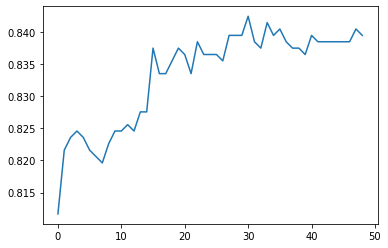

In [42]:
plt.plot(acc_list)
plt.show()


In [43]:
print(np.argmax(acc_list))

30


In [44]:
rf=RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=5,random_state=10)

In [45]:
rf.fit(X_clean,Y_clean)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [46]:
rf.score(X_clean,Y_clean)

0.8394449950445986

In [47]:
yans=rf.predict(test_cleaned)

In [48]:
yans

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0.

In [50]:
result=pd.DataFrame(yans,columns=["survived"])
result.index.name="Id"
result.to_csv("Submission.csv")

In [51]:
## using decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=10)

In [56]:
dt.fit(X_clean,Y_clean)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [57]:
dt.score(X_clean,Y_clean)

0.8870168483647175

In [58]:
ypred=dt.predict(test_cleaned)

In [61]:
resultt=pd.DataFrame(ypred,columns=["survived"])
resultt.index.name="Id"
resultt.to_csv("ssubmission.csv")